# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [21]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [13]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head(50)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [14]:
### What is the distribution of our target variable? Can we say we are dealing with an imbalanced dataset?

fraud['fraud'].value_counts(normalize=True)

fraud
0.0    0.912597
1.0    0.087403
Name: proportion, dtype: float64

In [15]:
### Train a logistic regression.

# Separate features (X) and target (y)
X = fraud.drop(columns=['fraud'])
y = fraud['fraud']

# Split into training and test sets (80/20), stratify keeps class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

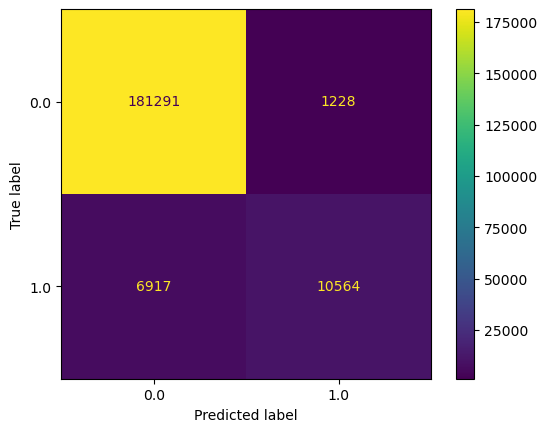

In [16]:
### Evaluate your model, take in consideration class importance, and evaluate it by selecting the correct metric.

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()

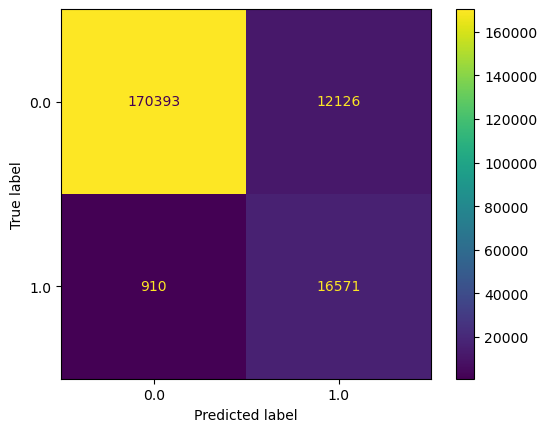

In [18]:
### Run oversample in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 

# 1. Oversample
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# 2. Re-train the model
log_reg.fit(X_resampled, y_resampled)

# 3. Predictions on test set
y_pred_resampled = log_reg.predict(X_test)

# 4. Confusion matrix
cm_resampled = confusion_matrix(y_test, y_pred_resampled)
disp_resampled = ConfusionMatrixDisplay(confusion_matrix=cm_resampled,
                                        display_labels=log_reg.classes_)
disp_resampled.plot()

Before oversampling:

TP (1→1): 10,564  
FN (1→0): 6,917  

After oversampling:

TP (1→1): 16,571 (significant increase → better recall for class 1)  
FN (1→0): 910 (significant decrease → very few positives are missed)  

The model clearly improved in detecting the minority class (1.0).  
The cost is an increase in false positives (12,126 vs 1,228), which is expected when balancing the data.

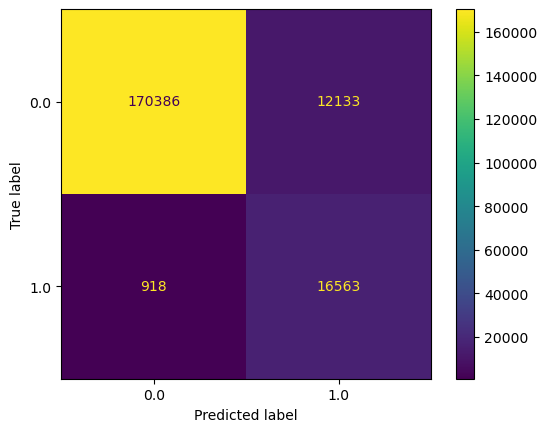

In [20]:
### Now run Undersample in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

# 1. Undersample
rus = RandomUnderSampler(random_state=42)
X_resampled_under, y_resampled_under = rus.fit_resample(X_train, y_train)

# 2. Re-train the model
log_reg.fit(X_resampled_under, y_resampled_under)

# 3. Predictions on test set
y_pred_under = log_reg.predict(X_test)

# 4. Confusion matrix
cm_under = confusion_matrix(y_test, y_pred_under)
disp_under = ConfusionMatrixDisplay(confusion_matrix=cm_under,
                                    display_labels=log_reg.classes_)
disp_under.plot()

After undersampling:

TP (1→1): 16,563  
FN (1→0): 918  

The model again improved in detecting the minority class (1.0) compared to the original unbalanced data.  
The performance is almost identical to the oversampling approach, with a significant increase in recall for class 1 and a higher number of false positives (12,133 vs 1,228 originally).  
The key difference is in the method: undersampling removes majority class samples, while oversampling duplicates or generates minority class samples.

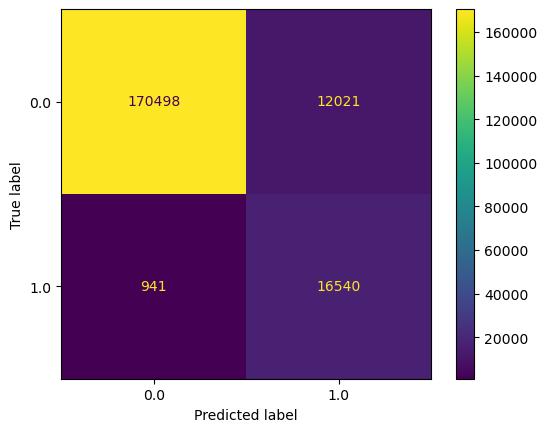

In [22]:
# 1) Apply SMOTE only to the training set
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# 2) Re-train the model with the balanced training data
log_reg.fit(X_smote, y_smote)

# 3) Predict on the original test set and display the confusion matrix
y_pred_smote = log_reg.predict(X_test)

cm_smote = confusion_matrix(y_test, y_pred_smote)
disp_smote = ConfusionMatrixDisplay(confusion_matrix=cm_smote,
                                    display_labels=log_reg.classes_)
disp_smote.plot()

After SMOTE:

TP (1→1): 16,540  
FN (1→0): 941  

The model again improved in detecting the minority class (1.0) compared to the original unbalanced data.  
The results are very similar to both oversampling and undersampling: recall for class 1 is much higher, while the number of false positives also increases (12,021 vs 1,228 originally).  
This shows that SMOTE balances the target variable effectively, but the trade-off is the same: better recall at the cost of precision.